In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
from scipy import sparse
from imageio import imread
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [2]:
#データ読み込み
jiro_df = pd.read_csv("mita_jiro.csv")

In [3]:
jiro_df.head()

,score,text
0,3.5,平日のランチ時12時ちょっと前に来店。既に行列は裏迄続いていたが、並ぶ事50分で店内に通され...
1,3.6,2020年2月平日18:05往訪、15-20名の並び。18:35に券売機にて購入、18:45...
2,3.5,11:00頃訪問田町駅から歩いて訪問慶應側から歩いて店の先まで見なくて並んだので後から気づい...
3,5.0,早朝作業の後は三田二郎で朝ラー9時台ならば並んでいないかな？と期待したけど、建物の角まで並ん...
4,3.7,昨日は、二郎インスパイア店に訪問したので、そろそろ二郎に行かないとと思っていました。2020...


In [4]:
#件数取得
len(jiro_df)

860

In [5]:
#null check
jiro_df.isnull().sum()

score    0
text     0
dtype: int64

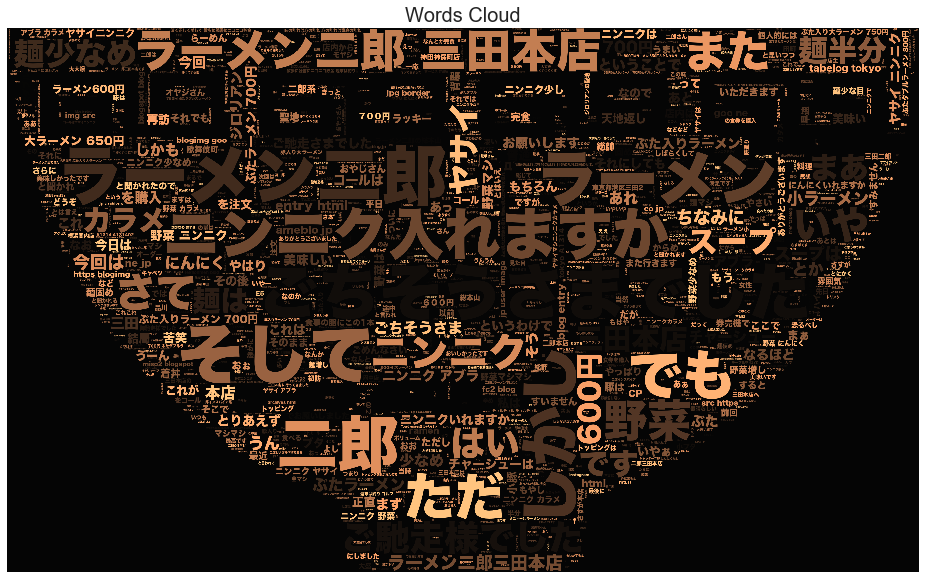

In [6]:
#clean comments
mask=np.array(Image.open("3504.png"))
mask=mask[:,:,1]
# wordcloud for clean comments
subset=jiro_df
text=subset.text.values
wc= WordCloud(font_path = "/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc" , background_color="black",max_words=2000,mask=mask)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words Cloud", fontsize=20)
plt.imshow(wc.recolor(colormap= 'copper_r' , random_state=17), alpha=0.98)
plt.show()

In [31]:
import pickle
def load(filepath):
    with open(filepath, 'rb') as f:
        return pickle.load(f)

In [34]:
emotion_result = load("results.pkl")

In [39]:
print(type(emotion_result))

<class 'list'>


In [62]:
type(emotion_result[0])

dict

In [58]:
l_name = [d.get('result') for d in emotion_result]

In [60]:
l_name_2 =[e.get('sentiment') for e in l_name]

In [61]:
l_name_2

['Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
